# Week 3: 2017/01/30-02/03

In [1]:
from tock import *

# Monday reading

Read Section 1.3, but you can save Lemma 1.60 and its proof for next time.

# Tuesday class

## Regular expressions

Regular expressions were invented by Stephen Kleene (pronounced clay-knee) back in the 1950s as a characterization of the languages recognized by the earliest neural networks. But they became widely used through various Unix tools, like `grep`, which is where you have likely encountered them.

![Regex Golf](http://imgs.xkcd.com/comics/regex_golf.png)

There are some differences between Unix regular expressions and true regular expressions. True regular expressions have three operations: concatenation, union ($\cup$ in the book, `|` in Unix), and Kleene star (`*`). The order of operations is star, then union, then concatenation. Use parentheses to change the order of operations, just as in arithmetic expressions.

Unix regular expressions use a dot (`.`) to match any symbol; the book uses $\Sigma$ for this purpose.

Another difference is that Unix regular expressions usually match anywhere in a string, whereas true regular expressions usually must match the entire string. When using `grep`, use the `-Ex` flags to approximate true regular expressions (`-E` to get the union operator, `-x` to match the whole line).

In [2]:
%%file movies.txt
the phantom menace
attack of the clones
revenge of the sith
a new hope
the empire strikes back
return of the jedi
the force awakens
rogue one
the last jedi
the motion picture
the wrath of khan
the search for spock
the voyage home
the final frontier
the undiscovered country
generations
first contact
insurrection
nemesis
into darkness
beyond

Overwriting movies.txt


In [3]:
!grep -Ex '.*(m | (t|n)|b).*' movies.txt

the phantom menace
attack of the clones
revenge of the sith
a new hope
the empire strikes back
return of the jedi
beyond


Almost right.

**Question.** Can you fix the regular expression so that it also accepts `the force awakens`, `rogue one`, and `the last jedi`, but not `beyond`?

## Converting regular expressions to NFAs

Regular expressions are the third "model of computation" of this course, and they, too, are equivalent to both DFAs and NFAs. The proof involves algorithms to convert between regular expressions and NFAs. Today we're converting regular expressions to NFAs, which is, I think, not as difficult as the subset construction from last time.

The algorithm in the book is a slight variation on the algorithm from a paper by Ken Thompson, one of the co-developers of Unix, [for the QED editor](https://swtch.com/~rsc/regexp/regexp1.html), from which are descended `sed`, `grep`, and `vi`. (But many modern regular expression engines actually do not use this algorithm, but one that is asymptotically much slower!)

Here's a step by step visualization of the example from the book. You can try different regular expressions to see how they get converted. (Note that in Tock, unlike in Unix tools, symbols in regular expressions are separated by spaces.)

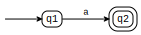

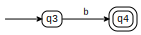

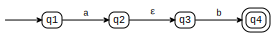

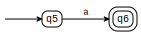

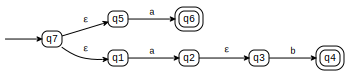

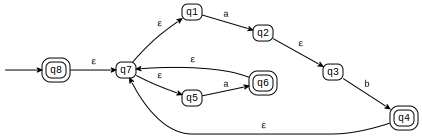

In [4]:
m = from_regexp('(a b|a)*', display_steps=True)

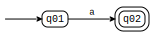

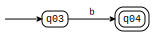

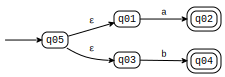

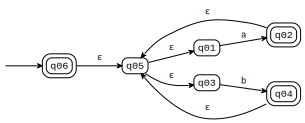

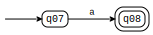

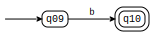

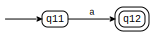

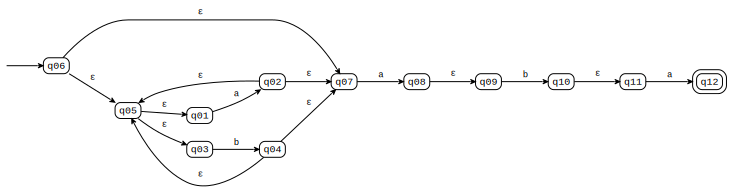

In [5]:
m = from_regexp('(a|b)* a b a', display_steps=True)

**Question.** If a regular expression has $n$ symbols, how big will the resulting NFA be?

For a very cool "real-time" visualization of (a slightly different version of) this construction, see [Debuggex](https://www.debuggex.com).

# Wednesday reading

Read or reread Lemma 1.60 and its proof, which (in my opinion) is the most complicated one so far.

# Thursday class

Homework 2 is due this evening.

## NFAs to regular expressions

Today we're completing the proof from last time by converting NFAs to regular expressions. The algorithm for this is known as the _state elimination_ algorithm, because it eliminates the states of the NFA one by one. 

To make this construction simpler, the new concept of a generalized NFA (GNFA) is introduced. In this course, GNFAs are a "throwaway" formalism; they exist just to make this proof possible. But elsewhere they might be useful in their own right.

A GNFA is a NFA whose transitions can be labeled with regular expressions instead of symbols. The algorithm first changes the NFA into a GNFA, and then eliminates the states one by one. When there is just one transition left, its label is the final answer.

The order of elimination is arbitrary, although some orders may lead to more compact regular expressions than others. Tock eliminates states in reverse alphabetical order, for no particularly good reason.

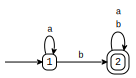

In [6]:
m66 = read_csv('sipser-1-66.csv')
m66

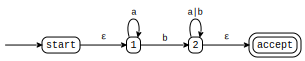

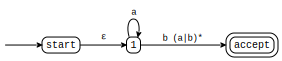

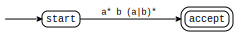

In [7]:
to_regexp(m66, display_steps=True)

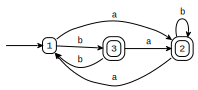

In [8]:
m68 = read_csv('sipser-1-68.csv')
m68

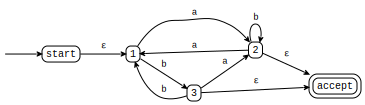

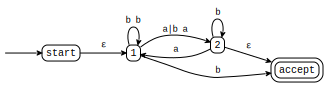

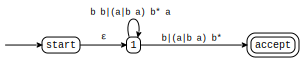

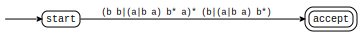

In [9]:
to_regexp(m68, display_steps=True)

(The answer is different from the book's because the elimination order was different.)